# Importer les modules et créer les fonctions nécessaire

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def model(X, theta):
    return X.dot(theta)

def fonction_cout(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def gradient(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def descente_gradient(X,y,theta,alpha,n_iterations):
    cost = np.zeros(n_iterations) 
    for i in range(n_iterations):
        theta = theta - alpha * gradient(X, y, theta)
        cost[i] = fonction_cout(X, y, theta)
    return theta, cost

def coef_determination(X, y, theta):
    return 1 - ((y - model(X, theta))**2).sum() / ((y - y.mean())**2).sum()

def hstack(x, degre=0):
    X = np.hstack((x, np.ones((x.shape[0], 1))))
    if degre == 0:
        return X
    else:
        for i in range(2, degre+1):
            X = np.hstack((x**i, X))
        return X

# Régression linéaire simple

In [4]:
simple = pd.read_csv("data/reg_simple.csv")
sns.set(style='white')

In [5]:
simple.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [6]:
x = np.array(simple.heure_rev)
y = np.array(simple.note)

In [7]:
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [8]:
X = hstack(x, degre=0)

In [9]:
X.shape

(27, 2)

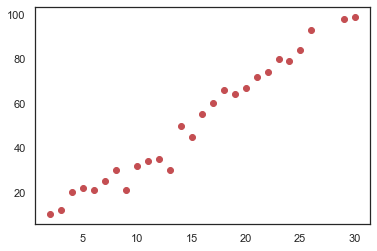

In [10]:
plt.scatter(x, y, c='r')
plt.show()

In [11]:
theta = np.random.randn(2, 1)
theta

array([[ 0.52818926],
       [-0.76291925]])

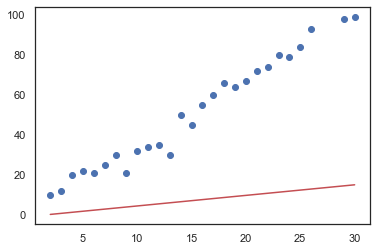

In [12]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

In [13]:
fonction_cout(X, y, theta)

1224.731802044433

In [14]:
gradient(X, y, theta)

array([[-845.28455699],
       [ -43.79886709]])

In [15]:
theta_final, cost_history = descente_gradient(X, y, theta, 0.001, 25)

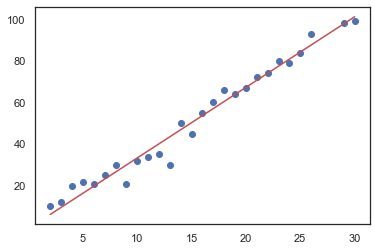

In [16]:
plt.scatter(x,y)
plt.plot(x, model(X, theta_final), c='r')

In [17]:
coef_determination(X, y, theta_final)

0.9729987201291386

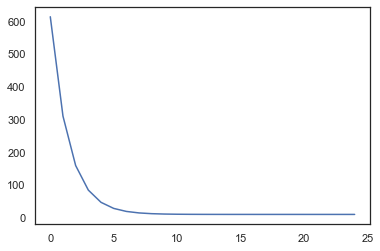

In [18]:
plt.plot(range(len(cost_history)), cost_history)
plt.show()

# Régression linéaire multiple

In [74]:
multiple = pd.read_csv("data/boston_house_prices.csv")

In [75]:
x = np.array(multiple.iloc[:, [5,12]])
y = np.array(multiple['MEDV'])
y = y.reshape(y.shape[0], 1)

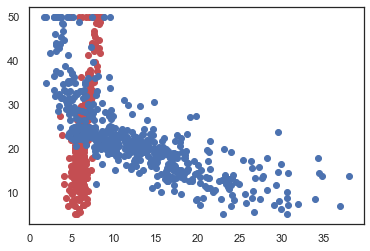

In [76]:
plt.scatter(x[:,0], y, color='r')
plt.scatter(x[:,1], y, color='b')

In [77]:
x.shape, y.shape
x

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [78]:
X = hstack(x, degre=0)
X.shape
X

array([[6.575, 4.98 , 1.   ],
       [6.421, 9.14 , 1.   ],
       [7.185, 4.03 , 1.   ],
       ...,
       [6.976, 5.64 , 1.   ],
       [6.794, 6.48 , 1.   ],
       [6.03 , 7.88 , 1.   ]])

In [79]:
theta = np.random.randn(3, 1)

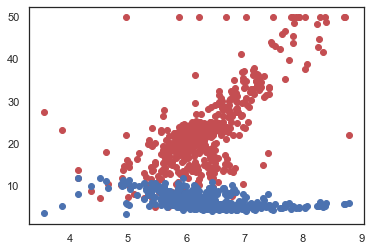

In [80]:
plt.scatter(x[:,0], y, color='r')
plt.scatter(x[:,0], model(X, theta), color='b')

In [81]:
fonction_cout(X, y, theta)

183.74675620962057

In [82]:
gradient(X, y, theta)

array([[-106.35399044],
       [-144.06840589],
       [ -16.12481648]])

In [83]:
theta_final, cost_history = descente_gradient(X, y, theta, 0.001, 250)

<Figure size 432x288 with 0 Axes>

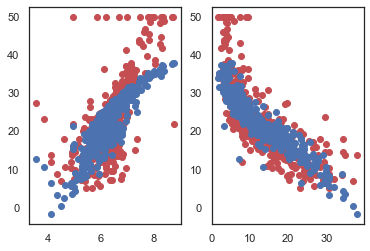

In [84]:
f = plt.figure()
f, axes = plt.subplots(1,2)

axes[0].scatter(x[:,0], y, color='r')
axes[0].scatter(x[:,0], model(X, theta_final), color='b')

axes[1].scatter(x[:,1], y, color='r')
axes[1].scatter(x[:,1], model(X, theta_final), color='b')

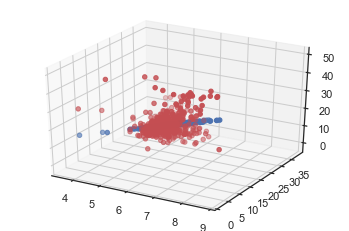

In [85]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, color='r')
ax.scatter(x[:,0], x[:,1], model(X, theta_final), color='b')
plt.show()

In [86]:
coef_determination(X, y, theta_final)

0.6282461230992269

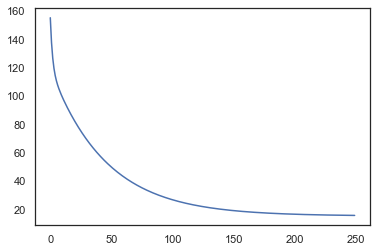

In [87]:
plt.plot(range(len(cost_history)), cost_history)
plt.show()

# Régression linéaire polynomiale

In [88]:
poly = pd.read_csv("data/Position_Salaries.csv")

In [89]:
x = np.array(poly['Level'])
y = np.array(poly['Salary'])
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

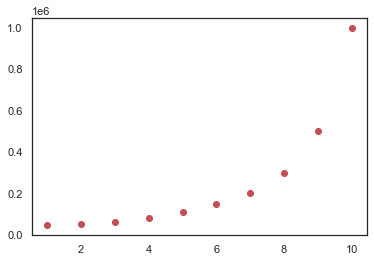

In [90]:
plt.scatter(x, y, c='r')

In [91]:
X = hstack(x, degre=5)


In [92]:
theta = np.random.randn(len(X[0]), 1)

In [93]:
fonction_cout(X, y, theta)

81062596268.63007

In [94]:
theta_final, cost_history = descente_gradient(X, y, theta, 0.000000001, 25)

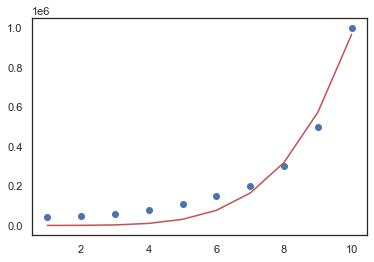

In [95]:
predictions = model(X, theta_final)

plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [96]:
coef_determination(X, y, theta_final)

0.9598914649784842

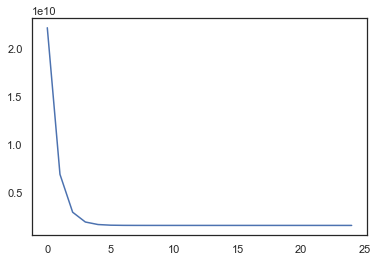

In [97]:
plt.plot(range(len(cost_history)), cost_history)
plt.show()

# Régression linéaire multiple (vins)

In [20]:
vins = pd.read_csv("data/qualite-vin-rouge.csv")

In [21]:
x = np.array(vins.iloc[:, 0:11])
y = np.array(vins['qualité'])
y = y.reshape(y.shape[0], 1)

In [22]:
X = hstack(x)

In [23]:
theta = np.random.randn(len(X[0]), 1)

In [24]:
fonction_cout(X, y, theta)

716.1775873657422

In [43]:
theta_final, cost_history = descente_gradient(X, y, theta, 0.0001, 25)

<Figure size 432x288 with 0 Axes>

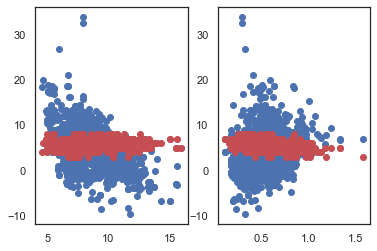

In [44]:
f = plt.figure()
f, axes = plt.subplots(1,2)

axes[0].scatter(x[:,0], model(X, theta_final), color='b')
axes[0].scatter(x[:,0], y, color='r')

axes[1].scatter(x[:,1], model(X, theta_final), color='b')
axes[1].scatter(x[:,1], y, color='r')

In [45]:
coef_determination(X, y, theta_final)

-28.949266816386817

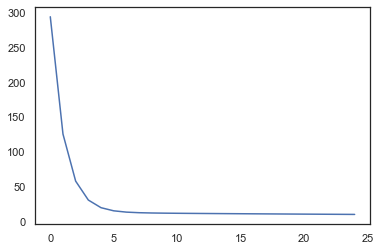

In [46]:
plt.plot(range(len(cost_history)), cost_history)
plt.show()